In [2]:
from Solve import psi
import numpy as np
n = 80000
wavefunction, x, t, A = psi([-200, 4096, -200, n])

import matplotlib.pyplot as plt
for i in range(0, n, 10**5):
    plt.plot(x, abs(wavefunction[i]))
plt.xlim(-40, 40)
#plt.ylim(0, 5)
plt.show()

KeyboardInterrupt: 

In [5]:
from datetime import datetime
a = np.array([1, 2, 3])
current_time = datetime.now()
np.save(f'./results/A_{current_time.strftime("%Y-%m-%d_%H-%M-%S")}.npy', a)

In [ ]:
    @jax.jit(static_argnames=['self'])
    def out_signal_calculation(self, t, psi):
        # Compute the gradient of f(1, t) with respect to x_pts
        dV_dx = jax.grad(lambda x: self.f(1, x))(t)  # Using JAX's auto-diff

        # Compute the integrand: -psi * dV_dx * conj(psi)
        integrand = -psi * dV_dx * jnp.conj(psi)

        # Trapezoidal integration over self.x_pts
        dx = self.x_pts[1] - self.x_pts[0]  # Assuming uniform spacing
        integral = jnp.sum(integrand, axis=-1) * dx

        # Return the real part of the integral
        return jnp.real(integral)

    @jax.jit(static_argnames=['self'])
    def wavelet_trasform(self, t, psi):
        scales = jnp.asarray(self.scales)
        t_pts = jnp.asarray(self.t_pts)
        t = jnp.asarray(t)
        tau = jnp.asarray(self.tau)
        psi = jnp.asarray(psi)

        # Define the wavelet function for one combination of t_pts and scales
        def wavelet_element(t_pt, scale):
            X = scale * (t - t_pt)
            return jnp.sqrt(scale / tau) * jnp.exp(-X**2 / (2 * tau**2) + 1j * X) * self.out_signal_calculation(t, psi)

        # Vectorize across t_pts and scales
        wavelet_vectorized = jax.vmap(jax.vmap(wavelet_element, in_axes=(None, 0)), in_axes=(0, None))
        return np.array(wavelet_vectorized(t_pts, scales))


UnboundLocalError: cannot access local variable 'cutoff' where it is not associated with a value

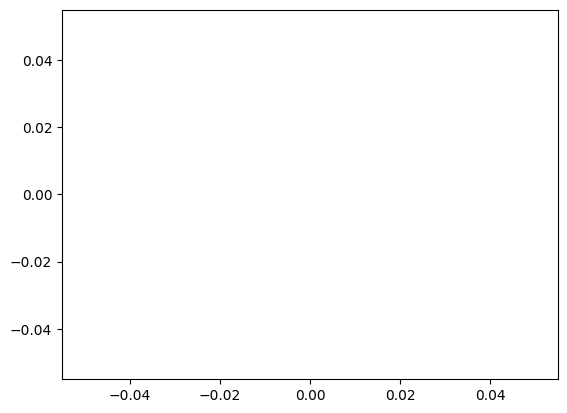

In [3]:
from Res_visualisation import *
from Parameters import pars_YanPengPhysRevA_78_033821
from Hydrogen import Hydrogen
from Field import Field

params = pars_YanPengPhysRevA_78_033821()[0]
plot_HH_spectrum(0, A, params)
imshow_time_frequency_characteristics(A)